In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn import tree
import pickle
%matplotlib inline

In [133]:
df=pd.read_csv('nutrition.csv')

In [134]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [135]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [136]:
df.drop(columns=['ID', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName'],inplace=True)

In [137]:
df.head()

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [138]:
df.FoodGroup.value_counts()

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

In [139]:
x=df.copy()
x.drop(columns=['FoodGroup'],inplace=True)
y=df['FoodGroup']

In [140]:
x.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [141]:
y.head()

0    Dairy and Egg Products
1    Dairy and Egg Products
2    Dairy and Egg Products
3    Dairy and Egg Products
4    Dairy and Egg Products
Name: FoodGroup, dtype: object

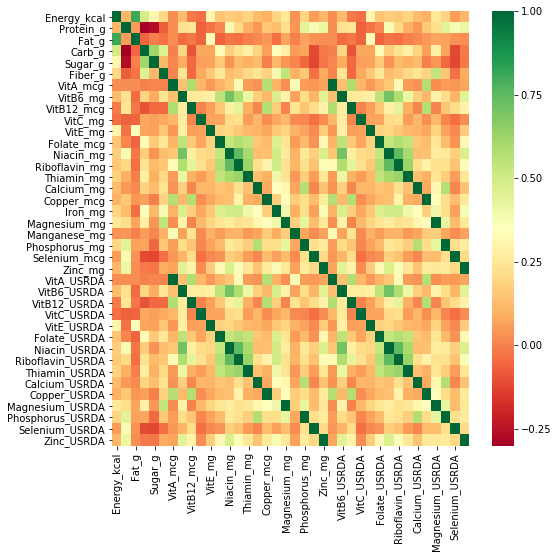

In [142]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),cmap="RdYlGn")

[0.05036874 0.05871241 0.04294473 0.06769383 0.03382405 0.02764265
 0.01683241 0.02421871 0.02241362 0.01621573 0.0133461  0.01867641
 0.03268708 0.01701606 0.02592086 0.02163048 0.01771715 0.0260096
 0.02312598 0.02060036 0.01917179 0.02728823 0.03109334 0.01604277
 0.02876714 0.02013623 0.0171167  0.01410228 0.02270655 0.03476696
 0.0182972  0.02599154 0.02367359 0.02095779 0.02288926 0.01967357
 0.02641731 0.03331083]


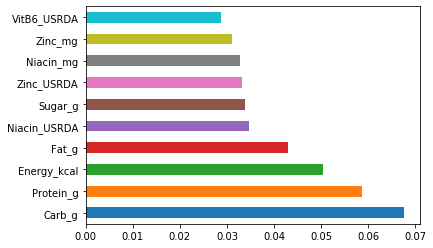

In [143]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [144]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3)

In [145]:
model = DecisionTreeClassifier(random_state=150)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.7509667440061871

In [146]:
ypredict=model.predict(xtest)
ypredict=pd.Series(ypredict)
result=pd.DataFrame()
result['ytest']=ytest
result=result.reset_index()
result['DtreeOutput']=ypredict
result.drop(columns='index',inplace=True)

[0.03312684 0.04943244 0.06705136 0.13522497 0.03348207 0.02835706
 0.0140475  0.01065304 0.02410274 0.04350914 0.00938419 0.01832601
 0.01912195 0.00721965 0.03111697 0.01190739 0.00892661 0.05873307
 0.00964337 0.04568655 0.02231898 0.02431353 0.01550552 0.00744238
 0.02946882 0.02517703 0.00478717 0.00392491 0.00786242 0.04815834
 0.00775853 0.02563547 0.02212314 0.013888   0.03213017 0.00580487
 0.02732947 0.01731833]


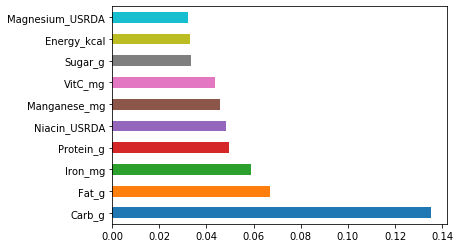

In [147]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [148]:
model=RandomForestClassifier(random_state=150)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8422273781902552

In [149]:
ypredict=model.predict(xtest)
ypredict=pd.Series(ypredict)
result['RFoutput']=ypredict

[0.0430972  0.05021633 0.04153225 0.07695151 0.025966   0.02900142
 0.01010306 0.01970412 0.02035306 0.02559822 0.01308124 0.02354694
 0.03112874 0.01839847 0.03833678 0.02274903 0.01954281 0.03310594
 0.01893171 0.03115665 0.01687986 0.02244316 0.04685492 0.01359163
 0.02265014 0.02711191 0.02211174 0.01341648 0.02030538 0.02237995
 0.01610205 0.02810854 0.0211746  0.01744632 0.02547249 0.02039484
 0.02354826 0.02750624]


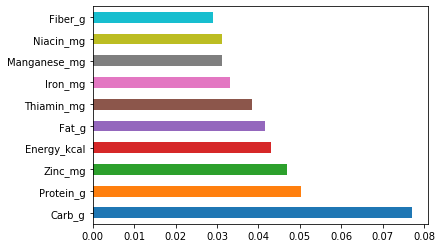

In [150]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [151]:
x_std=StandardScaler().fit_transform(x)
features=x_std.T
cov_mat=np.cov(features)

In [152]:
eig_val,eig_vec = np.linalg.eig(cov_mat)

In [153]:
projected_1=x.dot(eig_vec.T[0])

In [154]:
resultPCA=pd.DataFrame(projected_1,columns=['PC1'])
#resultPCA['y-axis']=0
resultPCA['output']=y

In [155]:
projected_2=x.dot(eig_vec.T[1])

In [156]:
resultPCA['PC2']=projected_2

In [157]:
resultPCA.dtypes

PC1       complex128
y-axis         int64
output        object
PC2       complex128
dtype: object

In [158]:
projected_3=x.dot(eig_vec.T[2])
resultPCA['PC3']=projected_3
newx=resultPCA[['PC1','PC2']]
newy=resultPCA['output']

In [159]:
newxtrain, newxtest, newytrain, newytest = train_test_split(newx,newy,test_size=0.3)

In [160]:
model=RandomForestClassifier(random_state=150)
model.fit(newxtrain,newytrain)
model.score(newxtest,newytest)

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.3700696055684455

In [161]:
projected_4=x.dot(eig_vec.T[3])
resultPCA['PC4']=projected_4

In [162]:
newx=resultPCA[['PC1','PC2','PC3','PC4']]
newy=resultPCA['output']

In [163]:
newxtrain, newxtest, newytrain, newytest = train_test_split(newx,newy,test_size=0.3)

In [164]:
model=RandomForestClassifier(random_state=150)
model.fit(newxtrain,newytrain)
model.score(newxtest,newytest)

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.5649651972157773

In [165]:
projected_5=x.dot(eig_vec.T[4])
resultPCA['PC5']=projected_5
newx=resultPCA[['PC1','PC2','PC3','PC4','PC5']]
newy=resultPCA['output']
newxtrain, newxtest, newytrain, newytest = train_test_split(newx,newy,test_size=0.3)
model=RandomForestClassifier(random_state=150)
model.fit(newxtrain,newytrain)
model.score(newxtest,newytest)

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.6191028615622584

In [166]:
projected_6=x.dot(eig_vec.T[5])
resultPCA['PC6']=projected_6

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.6492652745552978

In [170]:
projected_7=x.dot(eig_vec.T[6])
resultPCA['PC7']=projected_7
projected_8=x.dot(eig_vec.T[7])
resultPCA['PC8']=projected_8
projected_9=x.dot(eig_vec.T[8])
resultPCA['PC9']=projected_9
projected_10=x.dot(eig_vec.T[9])
resultPCA['PC10']=projected_10
projected_11=x.dot(eig_vec.T[10])
resultPCA['PC11']=projected_11
projected_12=x.dot(eig_vec.T[11])
resultPCA['PC12']=projected_12
projected_13=x.dot(eig_vec.T[12])
resultPCA['PC13']=projected_13
projected_14=x.dot(eig_vec.T[13])
resultPCA['PC14']=projected_14
projected_15=x.dot(eig_vec.T[14])
resultPCA['PC15']=projected_15
projected_16=x.dot(eig_vec.T[15])
resultPCA['PC16']=projected_16
projected_17=x.dot(eig_vec.T[16])
resultPCA['PC17']=projected_17
projected_18=x.dot(eig_vec.T[17])
resultPCA['PC18']=projected_18
projected_19=x.dot(eig_vec.T[18])
resultPCA['PC19']=projected_19
projected_20=x.dot(eig_vec.T[19])
resultPCA['PC20']=projected_20
projected_21=x.dot(eig_vec.T[20])
resultPCA['PC21']=projected_21
projected_22=x.dot(eig_vec.T[21])
resultPCA['PC22']=projected_22
projected_23=x.dot(eig_vec.T[22])
resultPCA['PC23']=projected_23
projected_24=x.dot(eig_vec.T[23])
resultPCA['PC24']=projected_24
projected_25=x.dot(eig_vec.T[24])
resultPCA['PC25']=projected_25
newx=resultPCA[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16'
               ,'PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25']]
newy=resultPCA['output']
newxtrain, newxtest, newytrain, newytest = train_test_split(newx,newy,test_size=0.3)
model=RandomForestClassifier(random_state=150)
model.fit(newxtrain,newytrain)
model.score(newxtest,newytest)

c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:433: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


0.7041763341067285